### https://github.com/intive-DataScience/tbats/tree/master/examples

In [1]:
%pylab inline
from tbats import BATS, TBATS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


                 y
ds                
2009-10-01  338630
2009-11-01  339386
2009-12-01  400264
2010-01-01  314640
2010-02-01  311022


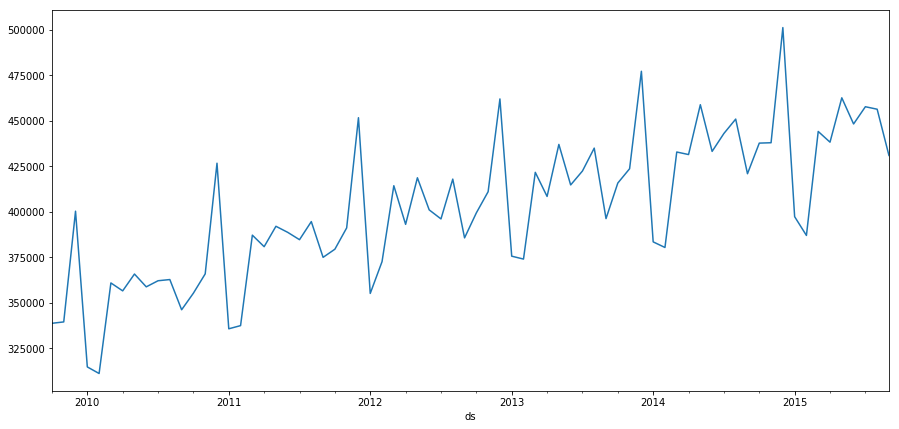

In [2]:
df = pd.read_csv('sales.csv',',', index_col=['ds'], parse_dates=['ds'], dayfirst=True)
print(df.head())
plt.figure(figsize(15,7))
df.y.plot()
pylab.show()

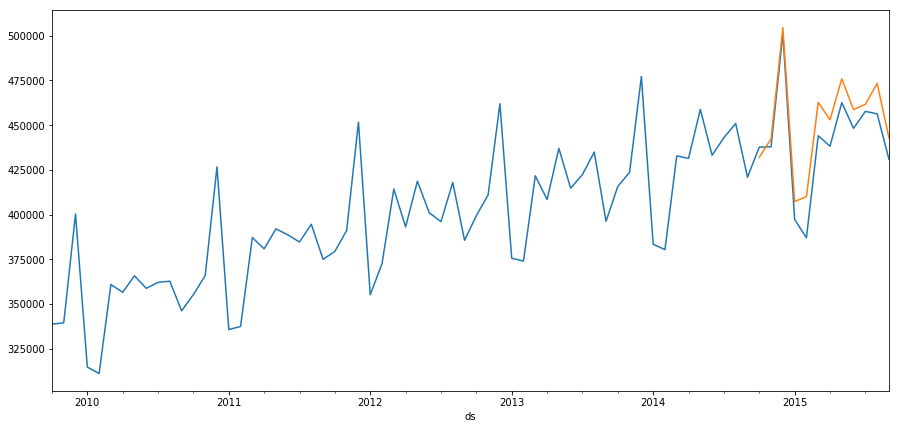

In [3]:
steps = 12

ds_to_train = df.index[:(len(df.index) - steps)]
ds_to_predict = df.index[(len(df.index) - steps):]

y_to_train = df.y[:(len(df.y) - steps)]
y_to_predict = df.y[(len(df.y) - steps):]

estimator = BATS(
    seasonal_periods=[12],
)

fitted_model = estimator.fit(y_to_train)
y_forecasted = fitted_model.forecast(steps=steps)
frc = pd.DataFrame(data={'y': y_forecasted}, index=ds_to_predict)
frc.rename({'': 'ds'}, axis=0)

df.y.plot()
frc.y.plot()

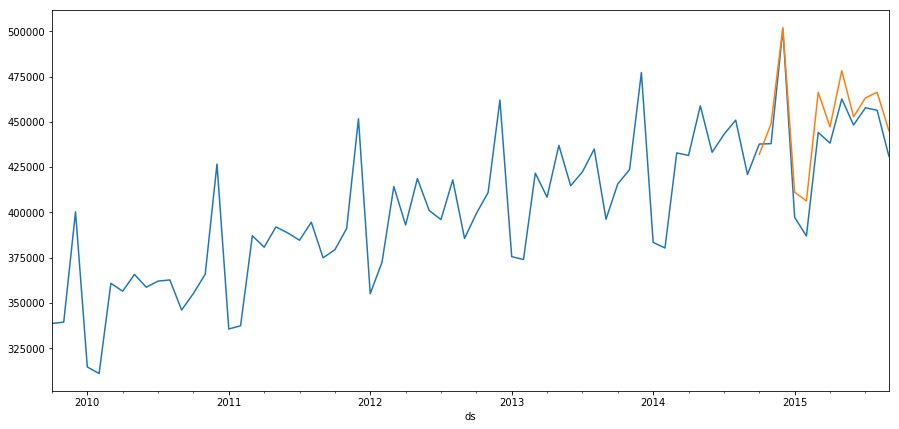

In [4]:
steps = 12

ds_to_train = df.index[:(len(df.index) - steps)]
ds_to_predict = df.index[(len(df.index) - steps):]

y_to_train = df.y[:(len(df.y) - steps)]
y_to_predict = df.y[(len(df.y) - steps):]

estimator = TBATS(
    seasonal_periods=[12],
)

fitted_model = estimator.fit(y_to_train)
y_forecasted = fitted_model.forecast(steps=steps)
frc = pd.DataFrame(data={'y': y_forecasted}, index=ds_to_predict)
frc.rename({'': 'ds'}, axis=0)

df.y.plot()
frc.y.plot()

In [5]:
# Lets check components used in the model
print('\n\nMODEL SUMMARY\n\n')
params = fitted_model.params
components = fitted_model.params.components

print('Smoothing parameter', params.alpha)

print('Seasonal periods',
      components.seasonal_periods)  # TBATS may choose non-seasonal model even if you provide seasons
print('Harmonics amount for each season', components.seasonal_harmonics)
print('1st seasonal smoothing parameters', params.gamma_1())  # one value for each season
print('2nd seasonal smoothing parameters', params.gamma_2())  # one value for each season

print('Trend and damping', components.use_trend, components.use_damped_trend)
print('Trend', params.beta)
print('Damping', params.phi)

print('Use Box-Cox', components.use_box_cox)
print('Box-Cox lambda interval that was considered', components.box_cox_bounds)
print('Box-Cox lambda', params.box_cox_lambda)

print('ARMA residuals modelling', components.use_arma_errors)
print('ARMA(p, q)', components.p, components.q)
print('AR parameters', params.ar_coefs)
print('MA parameters', params.ma_coefs)

print('Seed state', params.x0)

# Short model summary
print('\n\nSUMMARY FUNCTION\n\n')
print(fitted_model.summary())

print('\n\nIN SAMPLE PREDICTIONS\n\n')
print('Original time series (5 first values)', fitted_model.y[:5])
print('Predictions (5 first values)', fitted_model.y_hat[:5])
print('Residuals (5 first values)', fitted_model.resid[:5])

y_forecasted = fitted_model.forecast(steps=steps)

print('\n\nFORECAST\n\n')
print('Values', y_forecasted)
print('MAE', np.mean(np.abs(y_forecasted - y_to_predict)))



MODEL SUMMARY


Smoothing parameter 0.6509005751320421
Seasonal periods [12.]
Harmonics amount for each season [5]
1st seasonal smoothing parameters [-0.00221285]
2nd seasonal smoothing parameters [0.0127631]
Trend and damping True False
Trend 0.35215808014499544
Damping 1.0
Use Box-Cox True
Box-Cox lambda interval that was considered (0, 1)
Box-Cox lambda 0.39229168020555893
ARMA residuals modelling True
ARMA(p, q) 1 1
AR parameters [0.0127631]
MA parameters [-0.98959403]
Seed state [ 3.73635417e+02  5.20536801e-01  1.88105288e-01  1.26229738e+00
 -7.08777416e+00 -4.14377420e+00  5.55591242e+00 -1.99922846e+00
  6.17150858e+00  3.36220106e+00 -3.26246550e+00 -2.54792333e+00
  0.00000000e+00  0.00000000e+00]


SUMMARY FUNCTION


Use Box-Cox: True
Use trend: True
Use damped trend: False
Seasonal periods: [12.]
Seasonal harmonics [5]
ARMA errors (p, q): (1, 1)
Box-Cox Lambda 0.392292
Smoothing (Alpha): 0.650901
Trend (Beta): 0.352158
Damping Parameter (Phi): 1.000000
Seasonal Parameter

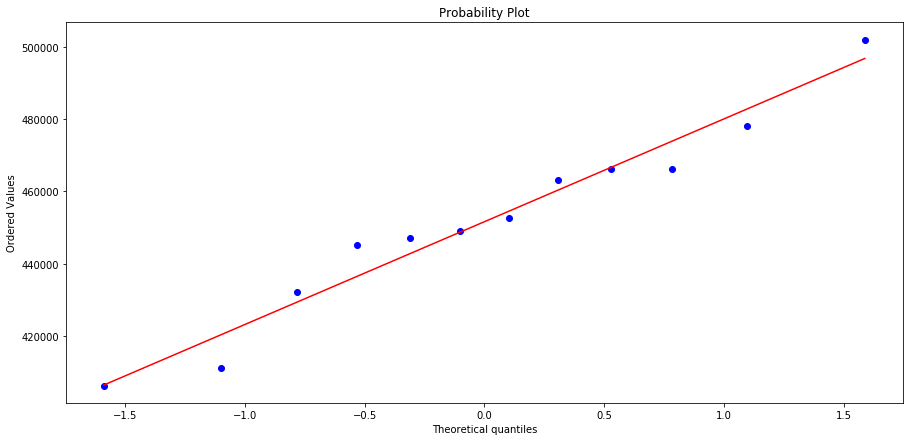

In [6]:
import scipy.stats as stats

measurements = y_forecasted
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

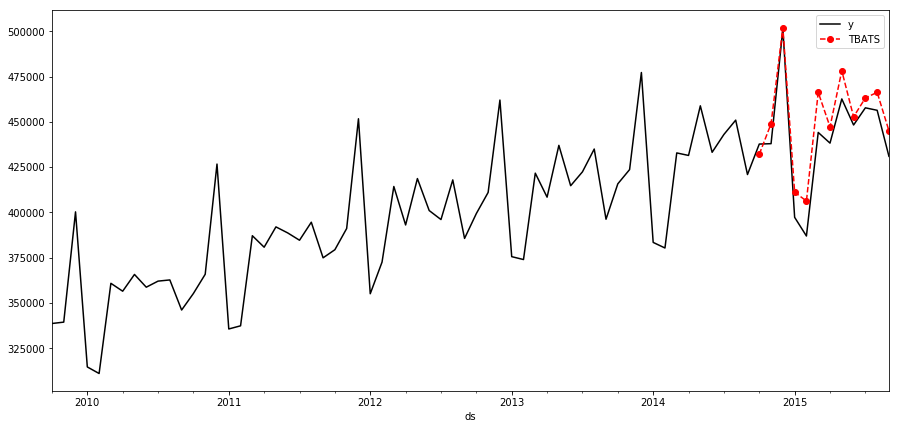

In [7]:
df_train = df[:-12]
df_test = df[-12:]

steps = 12

ds_to_train = df.index[:(len(df.index) - steps)]
ds_to_predict = df.index[(len(df.index) - steps):]

y_to_train = df.y[:(len(df.y) - steps)]
y_to_predict = df.y[(len(df.y) - steps):]

estimator = TBATS(
    seasonal_periods=[12],
)

fitted_model = estimator.fit(y_to_train)
y_forecasted = fitted_model.forecast(steps=steps)
frc = pd.DataFrame(data={'y': y_forecasted}, index=ds_to_predict)
frc.rename({'': 'ds'}, axis=0, inplace=True)
frc.rename({'y': 'TBATS'}, axis=1, inplace=True)

ftm = pd.DataFrame(data={'y': fitted_model.y_hat}, index=ds_to_train)
ftm.rename({'': 'ds'}, axis=0, inplace=True)

df.y.plot(color='black', legend=True)
frc.TBATS.plot(style='--', marker='o', color='red', legend=True)
# ftm.y.plot(style='--', marker='o', color='orange', legend=False)

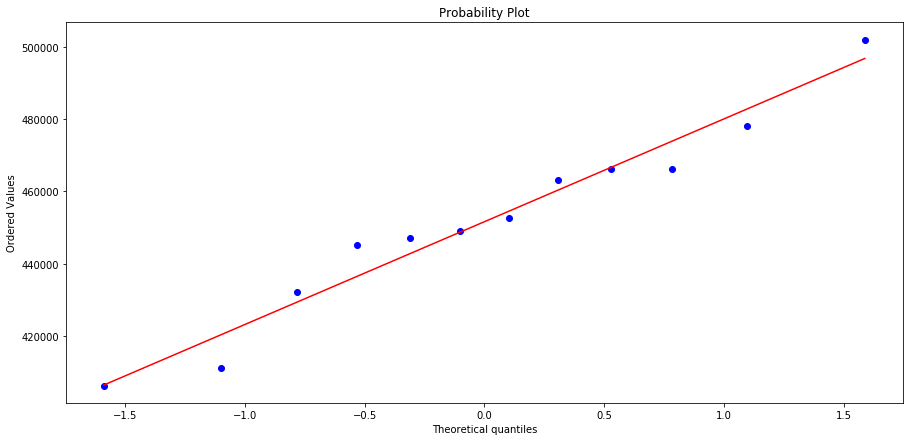

In [8]:
import scipy.stats as stats

measurements = y_forecasted
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()


In [9]:
print('MAE: {}'.format(np.mean(np.absolute(measurements - df[-12:].y))))
print('MAPE: {}'.format(np.mean(np.absolute(measurements -df[-12:].y)/df[-12:].y)))

MAE: 10941.266317423491
MAPE: 0.025406283632156013
